# Module 2, Section 1: Python for Data Visualisation

## Importing Libraries

First, let's import Matplotlib and any other libraries we will need this week.

In [10]:
# import required libraries into your jupyter notebook:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import datetime as dt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter

## The components of a Matplotlib figure

Before we start creating visualisations, we need to know how Matplotlib works. Matplotlib builds figures as an object-oriented hierarchy. What does this mean? Well, if we imagine our visualisation as a car, objects are the millions of individual components (wheels, windows, battery, paint colour etc) that when combined in a certain hierarchy form the car. In object-oriented programming, code objects take data (what we want to visualise) and procedures (plotting commands) to give an output (the visualisation). Matplotlib underlies many other plotting libraries (e.g., Seaborn, Pyplot) that automatically create a lot of the objects you need to create a visualisation. Going back to the car analogy, visualising with these libraries is a bit like buying a car and just customising the colour or engine size, rather than building the car from scratch yourself. Here, we're going to first briefly look at how Matplotlib creates visualisations from scratch. Then, when we use different other libraries that are built of Matplotlib, you're going to feel a bit confident that you know what's happening 'under the hood', and be more comfortable making changes as you need to create the visualisations you want, or searching for help when things don't work.

The official [Matplotlib website](https://matplotlib.org/) is the best resource for understanding how Matplotlib works, and how to use it to generate the visualisations you want, we'll be using this site for resources throughout this course as needed.

### Figure - your canvas
A Figure object is the outermost container for a Matplotlib visualisation. The figure object is the container that holds one or more actual plots. In other words, the figure object is the canvas on which you'll create your visualisation. Let's make one.

In [11]:
fig = plt.figure()  # an empty figure with no Axes

<Figure size 432x288 with 0 Axes>

### Axes - your plot/s
No visualisation yet. That's because we need to specify the region on the figure where we're going to visualise. These regions are called axes objects. This might seem redundant - isn't the figure itself the region we're visualising in? - but it's a necessary generalisation if we want to plot multiple visualisations (subplots) on the same figure, or annotate outside the axis of our plot. More broadly, the figure object is the container in which all the nested 'Artists' (axes, legends, colourbars, subplots etc) are kept together.

NOTE! One source of confusion here is the name 'Axes object': an Axes actually translates into what we think of as an individual plot or graph, rather than the plural of axis. Our x and y-axis (and z-axis in the case of 3D visualisations) are the Artist objects that give the boundaries of our plot, and they're further down the object hierarchy. 

So, let's make a figure, with a single axes:

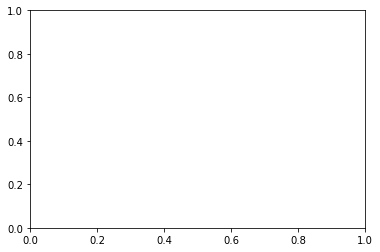

In [12]:
fig, ax = plt.subplots()  # a figure with a single Axes

Note that since we didn't pass any arguments to plt.subplots(), it creates a figure with a single axes. This is the default operation. But if we wanted a figure with multiple axes, we can specify:

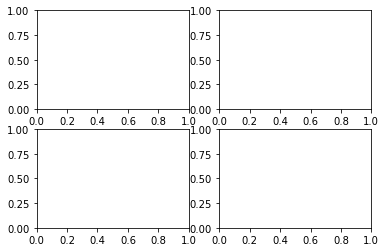

In [13]:
fig, ax = plt.subplots(2, 2)  # a figure with a 2x2 grid of Axes

**Exercise:** Create a figure object containing a 3x4 grid of Axes objects.

## Our first visualisation

Let's make our first visualisation. We'll start by loading a dataset containing the some information about the physiology and exercise of 30 
individuals.

In [14]:
df = pd.read_csv("exercise.csv")

The **pd.read_csv** command returns a Pandas dataframe, which we can confirm with:

In [15]:
type(df)

pandas.core.frame.DataFrame

Before we plot, let's have a quick look at the dataset. There are 90 rows with five columns with information.
We can see that some rows have numbers, others have words (string objects). But note that the first column is just an index of the rows,
so we can ignore it. 

In [16]:
df # Opens dataset

,Unnamed: 0,id,diet,pulse,time,kind
0,0,1,low fat,85,1 min,rest
1,1,1,low fat,85,15 min,rest
2,2,1,low fat,88,30 min,rest
3,3,2,low fat,90,1 min,rest
4,4,2,low fat,92,15 min,rest
...,...,...,...,...,...,...
85,85,29,no fat,135,15 min,running
86,86,29,no fat,130,30 min,running
87,87,30,no fat,99,1 min,running
88,88,30,no fat,111,15 min,running


We can use the variable (column) names in the dataframe to create figures with Matplotlib. For example,
what if we wanted to see the relationship between time spent exercising and
pulse rate? Let's visualise this with a scatter plot:

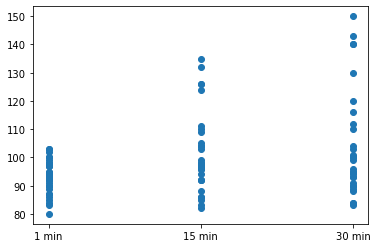

In [18]:
fig, ax = plt.subplots()  # a figure with a single Axes
ax.scatter(x = df.time, y = df.pulse) 
plt.show()

Let's pause here and look at what we've written. First, we created our figure container 'fig', containing a single axes object 'ax'. Second, we call our axes object to create a scatter plot with the 'time' variable from df on the x-axis, and the 'pulse' variable on the y-axis. 

This is a good first figure, but we can easily do more with this dataset. For example, there are three different kinds of exercise in the dataset

In [32]:
df.kind.unique() # We're asking for an array of the unique values in the "kind" column of the "df" dataframe.

array(['rest', 'walking', 'running'], dtype=object)

We can visualise the seperate relationship between "time" and "pulse" for each of these kinds of exercise, by adding to our axes object seperate scatterplot objects for each kind of exercise, with the colour 'c' variable in each scatterplot function allocated a different colour:

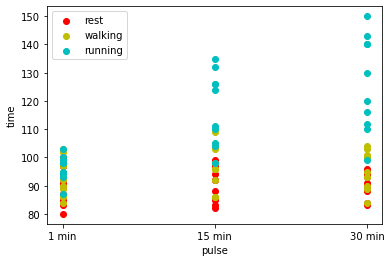

In [20]:
fig, ax = plt.subplots()  # a figure with a single Axes
ax.scatter(x = df.time[df.kind == "rest"], y = df.pulse[df.kind == "rest"], c = "r", label = "rest") 
ax.scatter(x = df.time[df.kind == "walking"], y = df.pulse[df.kind == "walking"], c = "y", label = "walking")
ax.scatter(x = df.time[df.kind == "running"], y = df.pulse[df.kind == "running"], c = "c", label = "running") 
ax.set_ylabel('time')
ax.set_xlabel('pulse')
ax.legend()
plt.show()

**Exercise:** Swap the colours of the **rest** group and the **walking** group in the visualisation above.

Above, we've created a simple scatterplot with multiple exercise groups distinguished by colour. We did this from scratch. First, we created a figure with a single Axes, then we visualised three scatterplots on that axis, where the points are coloured by which kind of exercise they are associated with. 

We mentioned earlier that there are many other libraries built on Matplotlib, that take care of calling some objects for you. These more declarative languages are simpler to use, allowing you to focus more on the story you're telling with your visualisations, but in some circumstances they give you less control. For example, Seaborn is a declarative plotting package built on Matplotlib. We imported it earler as **sns**. If we wanted to create a scatter plot like the one above, we can do it with Seaborn in a single line:

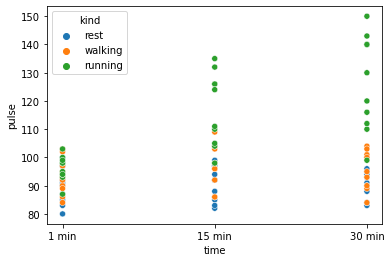

In [19]:
sns.scatterplot(data = df, x = "time", y = "pulse", hue = "kind")
plt.show()

Above, the Seaborn function **scatterplot** created the figure and axes objects, as well as x and y-axis labels and a legend for us, without us explicitly defining them. It also chose colours for each of the kinds of exercise for us too. More information about Seaborn, and the figures it can make, is available [here](https://seaborn.pydata.org/). 

We'll come back to Seaborn, and other plotting libraries as required throughout the course. We're not picky about what Python library to use - our objective is to make effective visualisations. However, most plotting libraries in Python are wrappers around Matplotlib, allowing you to focus on visualising rather than the technical details. To use the car analogy one more time - in this course we're more focussed on driving the car (i.e., communicating clearly with data) than building it. But, it's important we know a bit about what's going on 'under the hood' when we're generating visualisations in Python.

Going back to our multi-colour Matplotlib scatterplot, you should have noticed this command and others like it: 

**df.time[df.kind == "rest"]**

This command gives us as subset of the time variable, where the kind of exercise is rest. If you feel over your head about this subsetting command, don't wory. In the next section,
we're going to learn how to index, slice, subset and query our dataset using the Pandas library, before we visualise.

**Exercise:** Choose one of the Basic plot types on the Matplotlib website [here](https://matplotlib.org/stable/plot_types/index.html). In your own words, concisely explain step-by-step what the example code to generate your selected plot is doing. Feel free to use the rest of the Matplotlib website, or Google, if you're unsure about any parts of the code. Note, these examples generate their own data (under the 'make data' section of the code). It's fairly straightfoward, so if you're interested explore what they're doing here too. But since this is a visualisation course, make sure you understand the commands under the 'plot' section first.